In [1]:
import cv2 
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import math
import glob
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 
import seaborn as sns
#from sklearn import svm

In [2]:
def liff(folder,m,n):
    images = []
    for i in range(len(folder)):
        img = cv2.imread(folder[i])
        img= cv2.resize(img,(m,n), interpolation = cv2.INTER_AREA)
        img1 = cv2.flip(img, 1)
        img2=cv2.flip(img,0)
        img3=cv2.flip(img,2)
        img=np.array(255*(img / 255) ** 2, dtype = 'uint8')
        img1=np.array(255*(img1 / 255) ** 2, dtype = 'uint8')
        img2=np.array(255*(img2 / 255) ** 2, dtype = 'uint8')
        img3=np.array(255*(img3 / 255) ** 2, dtype = 'uint8')
        images.append(img)
        images.append(img1)
        images.append(img2)
        images.append(img3)
    images=np.array(images)
    
    return images

In [3]:
folder_positive=glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/*.jpeg')
folder_positive.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/*.jpg'))
folder_positive.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/*.png'))

In [4]:
folder_positive

['/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (61).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (43).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (81).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (66).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (49).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (53).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (63).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (71).jpeg',
 '/home/srikanth/Downloads/drive

In [5]:
positive_img=liff(folder_positive,128,128)

In [6]:
folder_negative=glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/Not_House/*.jpg')

In [7]:
negative_img=liff(folder_negative,128,128)

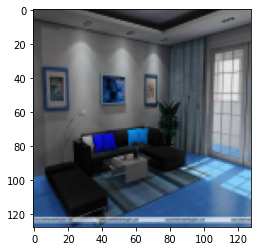

In [8]:
plt.imshow(positive_img[800])

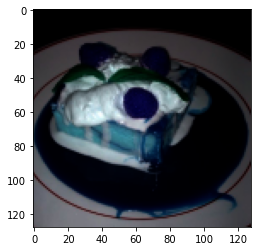

In [9]:
plt.imshow(negative_img[800])

In [10]:
pos_tar=[1]*(len(positive_img))

In [11]:
neg_tar=[0]*(len(negative_img))

In [12]:
img=np.concatenate([positive_img,negative_img])

In [13]:
target=np.concatenate([pos_tar,neg_tar])

/home/srikanth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

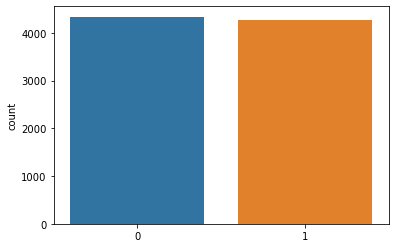

In [14]:

sns.countplot(target)

In [15]:
len(target)

8616

In [16]:
len(img)

8616

In [19]:
X_train, X_test, y_train, y_test = train_test_split(img, target, test_size=0.15, random_state=42)

In [20]:
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(128,128,3))
output = restnet.layers[-1].input
output = keras.layers.Flatten()(output)
restnet = Model(restnet.input, outputs=output)
for layer in restnet.layers:
    layer.trainable = False


In [21]:
model = Sequential()
model.add(restnet)
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=10, batch_size=150,verbose=1)

Epoch 1/10
49/49 [==============================] - 84s 2s/step - loss: 0.4622 - accuracy: 0.5357 - val_loss: 0.0651 - val_accuracy: 0.9343
Epoch 2/10
49/49 [==============================] - 82s 2s/step - loss: 0.0655 - accuracy: 0.9346 - val_loss: 0.0395 - val_accuracy: 0.9606
Epoch 3/10
49/49 [==============================] - 84s 2s/step - loss: 0.0313 - accuracy: 0.9692 - val_loss: 0.0234 - val_accuracy: 0.9768
Epoch 4/10
49/49 [==============================] - 86s 2s/step - loss: 0.0197 - accuracy: 0.9808 - val_loss: 0.0194 - val_accuracy: 0.9807
Epoch 5/10
49/49 [==============================] - 87s 2s/step - loss: 0.0191 - accuracy: 0.9810 - val_loss: 0.0222 - val_accuracy: 0.9783
Epoch 6/10
49/49 [==============================] - 89s 2s/step - loss: 0.0178 - accuracy: 0.9823 - val_loss: 0.0259 - val_accuracy: 0.9737
Epoch 7/10
49/49 [==============================] - 89s 2s/step - loss: 0.0225 - accuracy: 0.9771 - val_loss: 0.0242 - val_accuracy: 0.9760
Epoch 8/10
49/49 [==

In [22]:
pred_train=model.predict(X_train)
pred_test=model.predict(X_test)
pred_train

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [23]:
def convert(p_t):
    temp=[]
    for i in range(len(p_t)):
        temp.append(p_t[i][0])
    p_t=temp
    for i in range(len(p_t)):
        if p_t[i]<0.5:
            p_t[i]=0
        else:
            p_t[i]=1
    return p_t
pred_train=convert(pred_train)
pred_test=convert(pred_test)

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_test, pred_test)*100)
print(accuracy_score(y_train,pred_train)*100)
#sns.countplot(y_test,hue=pred_test)

98.22119102861562
98.73002867677182


In [25]:
def liff(folder,m,n):
    images = []
    for i in range(len(folder)):
        img = cv2.imread(folder[i])
        img= cv2.resize(img,(m,n), interpolation = cv2.INTER_AREA)
        img=np.array(255*(img / 255) ** 2, dtype = 'uint8')
        images.append(img)
    images=np.array(images)
    
    return images

In [26]:
f=glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/house/*.jpeg')
f.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/house/*.jpg'))
f.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/house/*.png'))

In [27]:
positive_img=liff(f,128,128)

In [28]:
pm=model.predict(positive_img)

In [29]:
pm=convert(pm)

/home/srikanth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

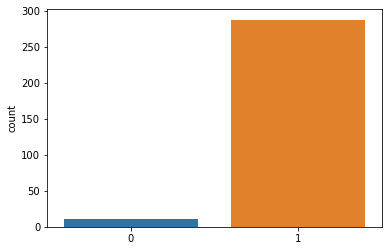

In [30]:
sns.countplot(pm)

In [31]:
f1=glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/not_house/*.jpeg')
f1.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/not_house/*.jpg'))
f1.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/not_house/*.png'))

In [32]:
negative_img=liff(f1,128,128)

In [33]:
pm1=model.predict(negative_img)

In [34]:
pm1=convert(pm1)

In [35]:
def prin_conf(model_name,conf_matrix):
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    conf_sensitivity = (TP / float(TP + FN))
    conf_specificity = (TN / float(TN + FP))
    print('the sensitivity of the'+model_name+' with dimensions is',conf_sensitivity*100)
    print('the specificity of the',model_name,' with dimensions is',conf_specificity*100)

In [36]:
pm2=np.concatenate([pm,pm1])

In [37]:
pos=[1]*len(pm)

In [38]:
neg=[0]*len(pm1)

In [39]:
tar=np.concatenate([pos,neg])

In [40]:
prin_conf(' 128*128',confusion_matrix(pm2,tar))

the sensitivity of the 128*128 with dimensions is 99.3103448275862
the specificity of the  128*128  with dimensions is 96.19377162629758


In [41]:
accuracy_score(pm2,tar)*100

97.75474956822107

In [43]:
model_json = model.to_json()
with open('model_128*128.json', "w") as json_file:
    json_file.write(model_json)
model.save_weights('model_128*128.h5')

In [44]:
from keras.models import load_model
from keras.models import model_from_json

In [45]:

json_file = open('models/model_128*128.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights('models/model_128*128.h5')
